# Time Series forecasting

## Task Decomposition

1) Exploratory Data Analysis (EDA): Examine trends, seasonality, and anomalies in energy consumption over time.

2) Time Series Decomposition: Decompose the series into trend, seasonality, and residual components.

3) Modeling: Apply forecasting models such as ARIMA, SARIMA, Prophet, or LSTM to predict future energy consumption.

4) Visualization: Create plots to visualize consumption patterns and forecast results.

### Exploratory Data Analysis (EDA): Examine trends, seasonality, and anomalies in energy consumption over time.

In [2]:
# import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [5]:
# upload data & rename columns

df = pd.read_csv('pjme_hourly.csv').rename(columns = {'Datetime':'dt', 'PJME_MW':'consumption'})
df.head()

,dt,consumption
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


**We will creat some time series features to see how the trends are impacted by day of week, hour, time of year, etc.**

In [12]:
import pandas as pd

def create_features(df, datetime_col='dt', label=None):
    """
    Creates time series features from a datetime column with snake_case names.
    """
    df = df.copy()
    df[datetime_col] = pd.to_datetime(df[datetime_col])  # ensure datetime
    
    df['hour'] = df[datetime_col].dt.hour
    df['day_of_week'] = df[datetime_col].dt.dayofweek
    df['quarter'] = df[datetime_col].dt.quarter
    df['month'] = df[datetime_col].dt.month
    df['year'] = df[datetime_col].dt.year
    df['day_of_year'] = df[datetime_col].dt.dayofyear
    df['day_of_month'] = df[datetime_col].dt.day
    df['week_of_year'] = df[datetime_col].dt.isocalendar().week

    X = df[['hour','day_of_week','quarter','month','year',
            'day_of_year','day_of_month','week_of_year']]
    
    if label:
        y = df[label]
        return X, y
    return X

# Usage
X, y = create_features(df, datetime_col='dt', label='consumption')
features_and_target = pd.concat([X, y], axis=1)
features_and_target.head()


,hour,day_of_week,quarter,month,year,day_of_year,day_of_month,week_of_year,consumption
0,1,1,4,12,2002,365,31,1,26498.0
1,2,1,4,12,2002,365,31,1,25147.0
2,3,1,4,12,2002,365,31,1,24574.0
3,4,1,4,12,2002,365,31,1,24393.0
4,5,1,4,12,2002,365,31,1,24860.0


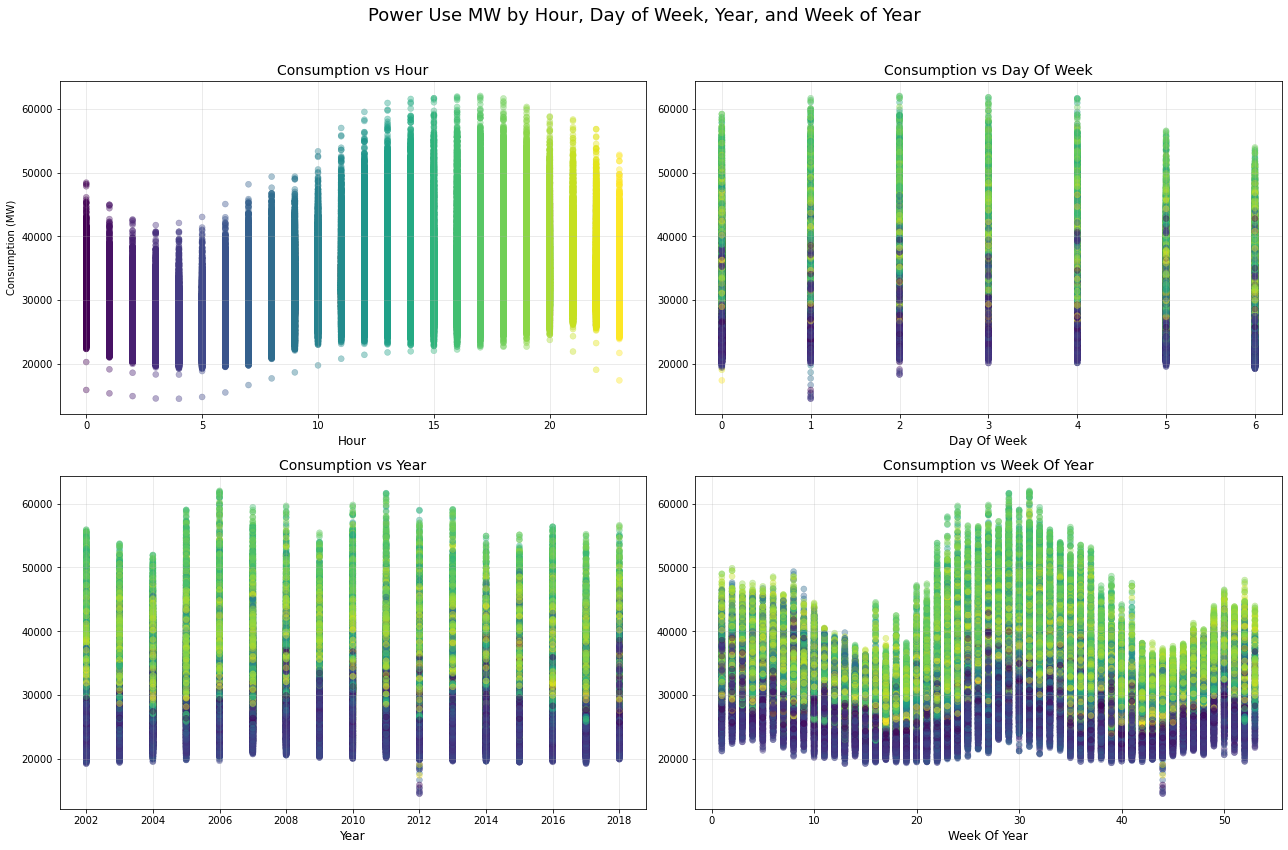

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['hour', 'day_of_week', 'year', 'week_of_year']
target = 'consumption'

plt.figure(figsize=(18, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(
        data=features_and_target.dropna(),
        x=feature,
        y=target,
        hue='hour',
        palette='viridis',
        alpha=0.4,
        edgecolor=None,
        legend=False
    )
    plt.xlabel(feature.replace('_', ' ').title(), fontsize=12)
    plt.ylabel('Consumption (MW)' if i == 1 else '')
    plt.title(f'{target.title()} vs {feature.replace("_", " ").title()}', fontsize=14)
    plt.grid(alpha=0.3)

plt.suptitle('Power Use MW by Hour, Day of Week, Year, and Week of Year', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:
# archive

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Возможные значения кубика
faces = np.arange(1, 7)
mean_roll = np.mean(faces)

def expected_value(t):
    """
    Мат. ожидание стратегии с порогом t:
    если x < t - перебрасываем,
    иначе принимаем x.
    """
    n = len(faces)
    # сумма выигрыша при x < t: берем 3.5 (мат. ожидание)
    low_part = (t - 1) * mean_roll if t > 1 else 0
    # сумма выигрыша при x >= t: просто сумма x
    high_part = np.sum(faces[faces >= t]) if t <= 6 else 0
    return (low_part + high_part) / n

thresholds = np.arange(1, 8)
expectations = [expected_value(t) for t in thresholds]

# Найдем оптимальный порог
opt_t = thresholds[np.argmax(expectations)]
opt_val = max(expectations)

# Визуализация
plt.figure(figsize=(8,5))
plt.plot(thresholds, expectations, marker='o')
plt.axvline(opt_t, color='red', linestyle='--', label=f'Оптимальный порог t={opt_t}')
plt.title('Мат. ожидание выигрыша в зависимости от порога переброса')
plt.xlabel('Порог переброса t (если выпало < t — перебрасываем)')
plt.ylabel('Мат. ожидание выигрыша')
plt.xticks(thresholds)
plt.grid(True)
plt.legend()
plt.show()

print(f"Оптимальная стратегия: перебрасывать, если результат первого броска меньше {opt_t}")
print(f"Максимальное мат. ожидание при этой стратегии: {opt_val:.3f}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  # чтобы результаты были воспроизводимыми

N = 100  # количество игр в симуляции
faces = np.arange(1, 7)
mean_roll = np.mean(faces)

def simulate_game(t, trials=N):
    """
    Симуляция игры с порогом t:
    - если первый бросок < t, перебрасываем и берём второй результат
    - иначе берём первый результат
    """
    results = []
    for _ in range(trials):
        first = np.random.randint(1, 7)
        if first < t:
            second = np.random.randint(1, 7)
            results.append(second)
        else:
            results.append(first)
    return np.mean(results)

# Запуск симуляции для всех порогов
thresholds = np.arange(1, 8)
simulated_E = [simulate_game(t) for t in thresholds]

# Теоретические значения для сравнения
def expected_value(t):
    low_part = (t - 1) * mean_roll if t > 1 else 0
    high_part = np.sum(faces[faces >= t]) if t <= 6 else 0
    return (low_part + high_part) / 6

theoretical_E = [expected_value(t) for t in thresholds]

# Визуализация
plt.figure(figsize=(8,5))
plt.plot(thresholds, theoretical_E, marker='o', label='Теоретическое E(t)', color='blue')
plt.plot(thresholds, simulated_E, marker='s', linestyle='--', label='Симуляция (1000 игр)', color='orange')
plt.axvline(thresholds[np.argmax(theoretical_E)], color='red', linestyle='--', label='Оптимальный t')
plt.title('Сравнение мат. ожиданий: теория vs симуляция')
plt.xlabel('Порог переброса t')
plt.ylabel('Мат. ожидание выигрыша')
plt.xticks(thresholds)
plt.grid(True)
plt.legend()
plt.show()

# Вывод в консоль
for t, sim, theo in zip(thresholds, simulated_E, theoretical_E):
    print(f"t={t}: Симуляция={sim:.3f}, Теория={theo:.3f}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  # фиксируем для воспроизводимости

faces = np.arange(1, 7)
mean_roll = np.mean(faces)

def simulate_game(t, trials):
    results = []
    for _ in range(trials):
        first = np.random.randint(1, 7)
        if first < t:
            second = np.random.randint(1, 7)
            results.append(second)
        else:
            results.append(first)
    return np.mean(results)

def expected_value(t):
    low_part = (t - 1) * mean_roll if t > 1 else 0
    high_part = np.sum(faces[faces >= t]) if t <= 6 else 0
    return (low_part + high_part) / 6

thresholds = np.arange(1, 8)
theoretical_E = [expected_value(t) for t in thresholds]

# Количества бросков для симуляции
trial_counts = [10, 100, 1000, 10000]
colors = ['orange', 'green', 'purple', 'brown']

plt.figure(figsize=(10,6))

# Теоретическая линия
plt.plot(thresholds, theoretical_E, marker='o', color='blue', label='Теория')

# Симуляции для разных N
for N, color in zip(trial_counts, colors):
    simulated_E = [simulate_game(t, N) for t in thresholds]
    plt.plot(thresholds, simulated_E, marker='s', linestyle='--', color=color, label=f'Симуляция (N={N})')

# Оптимальный порог
opt_t = thresholds[np.argmax(theoretical_E)]
plt.axvline(opt_t, color='red', linestyle='--', label=f'Оптимальный t={opt_t}')

plt.title('Сравнение теории и симуляций для разных N')
plt.xlabel('Порог переброса t')
plt.ylabel('Мат. ожидание выигрыша')
plt.xticks(thresholds)
plt.grid(True)
plt.legend()
plt.show()
